In this notebook, we'll implement K-means clustering from scratch to cluster data from the Iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data:
from sklearn.datasets import load_iris
data = load_iris()  # data is a dictionary containing lots of things

# List of the features and targets being measured:
print('Features: \n', data['feature_names'])
print('Targets: \n', data['target_names'])

# The input data (each row gives measurements of the features listed above):
X = data['data']
n_samples, n_features = np.shape(data['data'])
print('n_samples, n_features: ', (n_samples, n_features))

# The target data (subspecies identity):
y = data['target']

# Print the first few samples of x and y data:
print('X data: \n', X[:3,:])
print('y data: \n', y[:3])


Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: 
 ['setosa' 'versicolor' 'virginica']
n_samples, n_features:  (150, 4)
X data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y data: 
 [0 0 0]


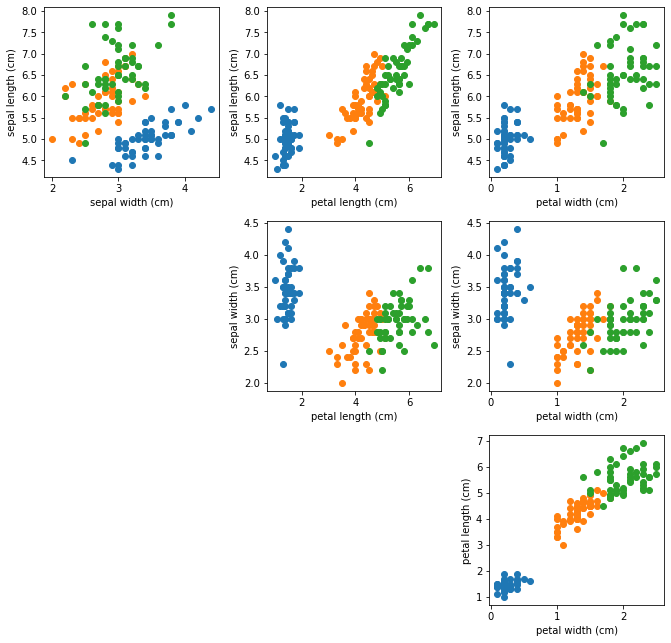

In [3]:
# Plot the four-dimensional data.

plt.figure(figsize=(12,12))
for i in range(4):
    for j in range(i+1,4):
        plt.subplot(4,4,int(4*(i+1)+j+1))
        for label in range(3):
            plt.plot(X[:,j][y==label], X[:,i][y==label], 'o')
            plt.xlabel(data['feature_names'][j])
            plt.ylabel(data['feature_names'][i])
        
plt.tight_layout()

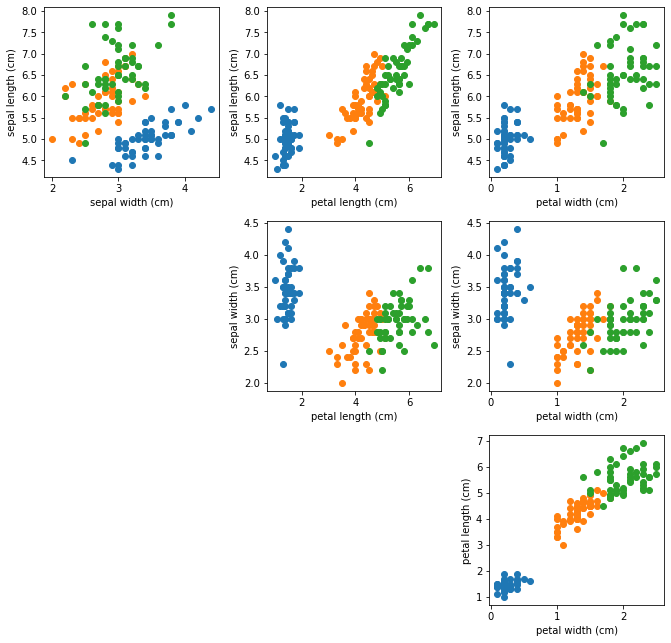

In [4]:
# For future convenience, we can wrap the plot code in a function.

def make_plot(labels):
    plt.figure(figsize=(12,12))
    for i in range(4):
        for j in range(i+1,4):
            plt.subplot(4,4,int(4*(i+1)+j+1))
            for label in range(3):
                plt.plot(X[:,j][labels==label], X[:,i][labels==label], 'o')
                plt.xlabel(data['feature_names'][j])
                plt.ylabel(data['feature_names'][i])

    plt.tight_layout()
    
make_plot(y)

**Exercise**: Fill in the missing lines of code in the block below to implement the K-means clustering algorithm. Plot the loss function over iterations of the algorithm. The main output that we care about is `cluster_IDs`, a 1D array of integers (0, 1, ..., K-1) denoting the cluster assignment of each data point.

Text(0, 0.5, 'Loss')

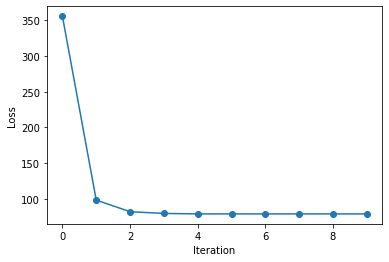

In [6]:
## Solution ##

# Number of clusters:
K = 3  

# Initial guesses of cluster means are randomly chosen data points:
mu = X[np.random.choice(n_samples, K), :]

# The K-means algorithm:
n_iter = 10
cluster_IDs = np.zeros(n_samples)
losses = []
for i in range(n_iter):
    # Assign each data point to the nearest mean vector (E step):
    for n in range(n_samples):
        distances = [np.linalg.norm(X[n,:] - mu[k,:]) for k in range(K)]
        cluster_IDs[n] = np.argmin(distances)
        
    # Recompute the mean vectors (M step):
    for k in range(K):
        mu[k,:] = np.mean(X[cluster_IDs==k], axis=0)

    # Compute the loss function:
    J = 0
    for k in range(K):
        J += np.linalg.norm(X[cluster_IDs==k,:] - mu[k,:])**2
    losses.append(J)

# Plot the loss function:
plt.plot(losses, '-o')
plt.xlabel('Iteration')
plt.ylabel('Loss')

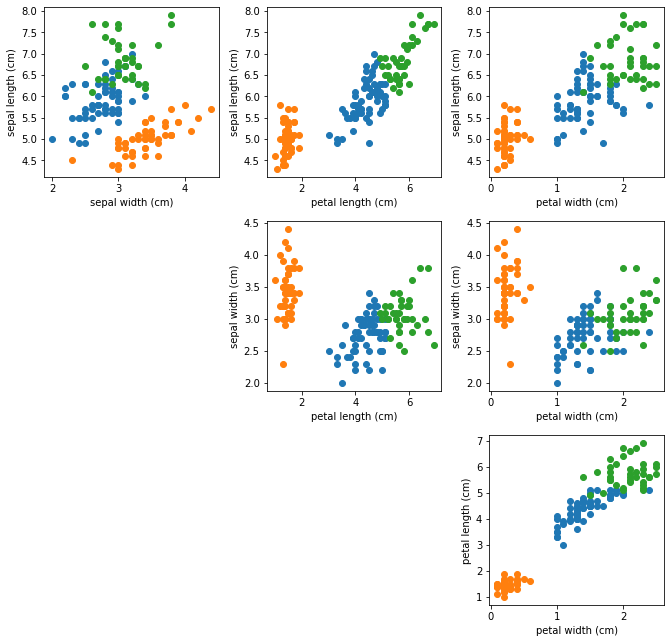

In [71]:
make_plot(cluster_IDs)

To do this in a way that's more generally useful, we can wrap the above block of code into a function that implements the algorithm.

**Exercise**: Turn the above block of code into a function, `k_means(X, K)`, which returns `cluster_IDs`.

In [73]:
## Solution ##

def k_means(X, K, n_iter=10, plot_loss=False):
    '''
    Implement the K-means algorithm on data X (2D array of shape n_samples-by-n_features)
    with K clusters. Returns a 1D array of integers giving the cluster identities of each
    data point.
    '''
    n_samples, n_features = np.shape(X)
    
    # Initial guesses of cluster means are randomly chosen data points:
    mu = X[np.random.choice(n_samples, K), :]

    # The K-means algorithm:
    cluster_IDs = np.random.choice(K, n_samples)
    losses = []
    for i in range(n_iter):
        # Compute the loss function:
        J = 0
        for k in range(K):
            J += np.linalg.norm(X[cluster_IDs==k,:] - mu[k,:])**2
        losses.append(J)

        # Assign each data point to the nearest mean vector (E step):
        for n in range(n_samples):
            distances = [np.linalg.norm(X[n,:] - mu[k,:]) for k in range(K)]
            cluster_IDs[n] = np.argmin(distances)

        # Recompute the mean vectors (M step):
        for k in range(K):
            mu[k,:] = np.mean(X[cluster_IDs==k], axis=0)

    if plot_loss:
        # Plot the loss function:
        plt.plot(losses, '-o')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        
    return cluster_IDs

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


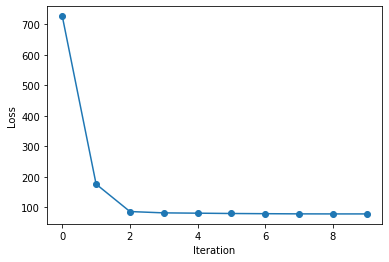

In [78]:
# Try running our function and looking at the results.

labels = k_means(X, 3, plot_loss=True)
print(labels)

As usual, there's also an easier way to do this using a built-in function from `sk-learn`.

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
